In [1]:
%matplotlib inline
projecttitle = 'Analogy'
import sys, os
# change this to your path
sys.path.append(os.path.join("/Users", "adam1brownell", "Documents", "GitHub", "task-fmri-utils"))


In [2]:
os.getcwd()

'C:\\Users\\adam1brownell'

In [3]:
os.chdir('C:\\Users\\adam1brownell' + '\Documents\Dev101\MontiLab')

Load Data

In [4]:
from fmri_core import analysis as pa
from fmri_core import utils as pu

In [5]:
import scipy.io
import numpy as np

subj = "01" #Within Subject Models

#AB Data Load
abLoad = scipy.io.loadmat("sub-"+subj+"_task-analogy_ab-betas-ba10.mat")
abData    = abLoad["data"]      # actual data (numpy array)
abAnalogy = abLoad["trial_id"]  # actual analogy they saw
abArray   = abLoad["main_rel"]  # main relationship (1,2,3)
abRel     = [abArray[0,i][0]for i in range(288)] #I'm cheating and now there are 288 examples
abSub     = abLoad["sub_rel"]   # sub relationship (1-9)

#CD Data Load
cdLoad = scipy.io.loadmat("sub-"+subj+"_task-analogy_cd-betas-ba10.mat")
cdData    = cdLoad["data"]      # actual data (numpy array)
cdAnalogy = cdLoad["trial_id"]  # actual analogy they saw
cdArray   = cdLoad["main_rel"]  # main relationship (1,2,3)
cdRel     = [cdArray[0,i][0]for i in range(288)] #I'm cheating and now there are 288 examples
cdSub     = cdLoad["sub_rel"]   # sub relationship (1-9)



#for i in data:
#	if '__' not in i and 'readme' not in i:
#		np.savetxt("sub14_ab"+i+".csv",data[i],delimiter=',')

Scale + Ridge Regression

In [6]:
## PREPROCCESSING ##
from sklearn import preprocessing
from sklearn.linear_model import Ridge

abDataScale = preprocessing.scale(abData) #Scaling before Ridge so that independent variables are not penalized differently

ridgeSmall = Ridge(alpha = 0.1)
ridgeMed   = Ridge(alpha = 1.0)
ridgeLarge = Ridge(alpha = 10.0)

ridgeSmall.fit(abDataScale,abRel)
ridgeMed.fit(abDataScale,abRel)
ridgeLarge.fit(abDataScale,abRel)

## Data Viz ##
import pandas as pd

small = pd.Series(ridgeSmall.coef_.reshape(7551,))
med = pd.Series(ridgeMed.coef_.reshape(7551,))
large = pd.Series(ridgeLarge.coef_.reshape(7551,))

alphaChart = pd.DataFrame(pd.concat([small,med, large], axis = 1))
alphaChart.columns = ["Small Alpha","Medium Alpha", "Large Alpha"]
alphaChart

,Small Alpha,Medium Alpha,Large Alpha
0,-0.004345,-0.004345,-0.004351
1,-0.004591,-0.004589,-0.004572
2,0.012339,0.012302,0.011950
3,0.005145,0.005133,0.005017
4,0.004154,0.004154,0.004155
5,0.008317,0.008304,0.008185
6,0.001916,0.001919,0.001946
7,0.001244,0.001256,0.001367
8,-0.012271,-0.012249,-0.012034
9,-0.009887,-0.009864,-0.009642


In [23]:
ridgeLarge.score(np.array(abDataScale), np.array(abRel))

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

array([[ 0.68664034, -1.29828671,  0.63542437, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38643967,  0.09583183, -0.85752847, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66296341, -0.05939487,  0.8548012 , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [-0.83910196, -2.06478721, -0.83330029, ...,  0.        ,
         0.        ,  0.        ],
       [-0.8114011 ,  0.98262876, -0.08454345, ...,  0.        ,
         0.        ,  0.        ],
       [-0.48874245,  0.2754206 , -1.38495004, ...,  0.        ,
         0.        ,  0.        ]])

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(abData)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

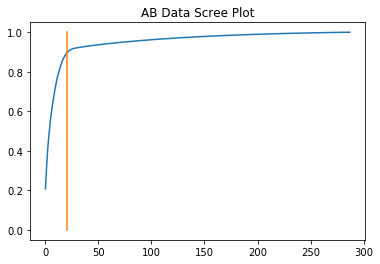

Vertical Line at 20 PrComps


In [20]:
var = 0
varExp = []
for i in pca.explained_variance_ratio_:
    var = var + i
    varExp.append(var)

import matplotlib.pyplot as plt
plt.plot(range(len(pca.explained_variance_ratio_)), varExp)
plt.plot([20,20], [0,1])
plt.title("AB Data Scree Plot")
plt.show()
print("Vertical Line at 20 PrComps")

In [29]:
pca20 = PCA(n_components = 20)
pcaData = pca20.fit_transform(abData)

In [30]:
pcaData.shape

(288, 20)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(pcaData[1:280,],abRel[1:280])

#Score Training Acc, AB Testing Acc and CD Testing Acc
from sklearn.metrics import confusion_matrix

print("\nTraining Score")
abTest = confusion_matrix(y_true = abRel[1:280],y_pred=rf.predict(pcaData[1:280,]))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(abRel[1:280]))

print("\nAB Test Score")
abTest = confusion_matrix(y_true = abRel[280:],y_pred=rf.predict(pcaData[280:,]))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(abRel[280:]))

cdDataScale = pca20.fit_transform(cdData)
print("\nCD Test Score")
abTest = confusion_matrix(y_true = cdRel,y_pred=rf.predict(cdDataScale))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(cdRel))


Training Score
[[94  0  1]
 [ 2 92  0]
 [ 3  1 86]]
Accuracy:  0.974910394265

AB Test Score
[[0 0 0]
 [0 2 0]
 [1 3 2]]
Accuracy:  0.5

CD Test Score
[[35 30 31]
 [32 29 35]
 [27 38 31]]
Accuracy:  0.329861111111


Random Forest - Scaled

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(abDataScale[1:280,],abRel[1:280])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
#Score Training Acc, AB Testing Acc and CD Testing Acc
from sklearn.metrics import confusion_matrix

print("\nTraining Score")
abTest = confusion_matrix(y_true = abRel[1:280],y_pred=rf.predict(abDataScale[1:280,]))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(abRel[1:280]))

print("\nAB Test Score")
abTest = confusion_matrix(y_true = abRel[280:],y_pred=rf.predict(abDataScale[280:,]))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(abRel[280:]))

cdDataScale = preprocessing.scale(cdData)
print("\nCD Test Score")
abTest = confusion_matrix(y_true = cdRel,y_pred=rf.predict(cdDataScale))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(cdRel))


Training Score
[[95  0  0]
 [ 0 94  0]
 [ 0  0 90]]
Accuracy:  1.0

AB Test Score
[[0 0 0]
 [0 2 0]
 [1 1 4]]
Accuracy:  0.75

CD Test Score
[[40 30 26]
 [31 34 31]
 [32 33 31]]
Accuracy:  0.364583333333


Random Forest - Unscaled

In [79]:
## Unscaled Data ##
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(abData[1:280,],abRel[1:280])

print("\nTraining Score")
abTest = confusion_matrix(y_true = abRel[1:280],y_pred=rf.predict(abData[1:280,]))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(abRel[1:280]))

print("\nAB Test Score")
abTest = confusion_matrix(y_true = abRel[280:],y_pred=rf.predict(abData[280:,]))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(abRel[280:]))

print("\nCD Test Score")
abTest = confusion_matrix(y_true = cdRel,y_pred=rf.predict(cdData))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(cdRel))


Training Score
[[95  0  0]
 [ 0 94  0]
 [ 0  0 90]]
Accuracy:  1.0

AB Test Score
[[0 0 0]
 [0 2 0]
 [1 1 4]]
Accuracy:  0.75

CD Test Score
[[39 28 29]
 [30 37 29]
 [28 36 32]]
Accuracy:  0.375


In [26]:
from sklearn.feature_selection import chi2
abDataScalePos = abDataScale - np.amin(abDataScale) #Minus bc its a negative number

stat, pval = chi2(abDataScalePos,abRel)

In [32]:
chiChart = pd.DataFrame(data = pd.concat([pd.Series(stat),pd.Series(pval)], axis = 1))
chiChart.columns = ["Chi2 Val","P Val"]
print("Smallest P Val:", np.amin(pval))
chiChart

Smallest P Val: 0.295052070186


In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

lda_svd = lda()
lda_svd.fit(abDataScale,abRel)

C:\Users\adam1brownell\Anaconda2\envs\py36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

Stepwise Regression due to Collinearity: Least Angle Regression (LARS)

In [38]:
## LARS is similar to forward stepwise regression
from sklearn.linear_model import Lars

stepwise = Lars()
stepwise.fit(abData,abRel)

Lars(copy_X=True, eps=2.2204460492503131e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=500, normalize=True, positive=False,
   precompute='auto', verbose=True)

In [54]:
## Reduced Dimensionality from 7551 to 388
abDataSelect = abDataScale[:,stepwise.active_]

In [55]:
## LARS data rf ##
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(abDataSelect[1:280,],abRel[1:280])

print("\nTraining Score")
abTest = confusion_matrix(y_true = abRel[1:280],y_pred=rf.predict(abDataSelect[1:280,]))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(abRel[1:280]))

print("\nAB Test Score")
abTest = confusion_matrix(y_true = abRel[280:],y_pred=rf.predict(abDataSelect[280:,]))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(abRel[280:]))

cdDataSelect = cdDataScale[:,stepwise.active_]
print("\nCD Test Score")
abTest = confusion_matrix(y_true = cdRel,y_pred=rf.predict(cdDataSelect))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(cdRel))


Training Score
[[95  0  0]
 [ 0 94  0]
 [ 0  0 90]]
Accuracy:  1.0

AB Test Score
[[0 0 0]
 [0 0 2]
 [2 0 4]]
Accuracy:  0.5

CD Test Score
[[41 29 26]
 [32 36 28]
 [29 35 32]]
Accuracy:  0.378472222222


Stepwise Regression on CD Data to compare to AB

In [56]:
CDstepwise = Lars()
CDstepwise.fit(cdData,cdRel)

Lars(copy_X=True, eps=2.2204460492503131e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=500, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [58]:
len(CDstepwise.active_)

392

In [60]:
stepwise2 = []
for i in stepwise.active_:
    if i in CDstepwise.active_:
        stepwise2.append(i)

In [62]:
len(stepwise2)

38

In [63]:
stepwise2

[5838,
 1382,
 6035,
 301,
 476,
 5187,
 1995,
 7420,
 629,
 3574,
 3207,
 2263,
 4173,
 6214,
 6606,
 4769,
 402,
 3511,
 6985,
 4682,
 5568,
 5461,
 5338,
 659,
 620,
 3829,
 2778,
 2155,
 3130,
 1604,
 1063,
 6473,
 1753,
 4987,
 6386,
 6021,
 6569,
 3347]

Compare P vals from Conjoined Stepwise and AB Stepwise

In [76]:
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(abDataScale[:,stepwise.active_],abRel)

cdDataSelect = cdDataScale[:,stepwise.active_]
print("\nAB Stepwise, Test Score")
abTest = confusion_matrix(y_true = cdRel,y_pred=rf.predict(cdDataSelect))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(cdRel))

rf = RandomForestClassifier(n_estimators = 50)
rf.fit(abDataScale[:,CDstepwise.active_],abRel)


cdDataSelect = cdDataScale[:,CDstepwise.active_]
print("\nCD Stepwise, Test Score")
abTest = confusion_matrix(y_true = cdRel,y_pred=rf.predict(cdDataSelect))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(cdRel))


rf = RandomForestClassifier(n_estimators = 50)
rf.fit(abDataScale[:,stepwise2],abRel)


cdDataSelect = cdDataScale[:,stepwise2]
print("\nCombined Stepwise, Test Score")
abTest = confusion_matrix(y_true = cdRel,y_pred=rf.predict(cdDataSelect))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(cdRel))


AB Stepwise, Test Score
[[41 30 25]
 [32 37 27]
 [31 34 31]]
Accuracy:  0.378472222222

CD Stepwise, Test Score
[[42 32 22]
 [29 41 26]
 [32 37 27]]
Accuracy:  0.381944444444

Combined Stepwise, Test Score
[[30 31 35]
 [28 38 30]
 [36 36 24]]
Accuracy:  0.319444444444


Fighting The Free Lunch: Trying above with LDA

In [77]:
lda_svd = lda()
lda_svd.fit(abDataScale[:,stepwise.active_],abRel)

cdDataSelect = cdDataScale[:,stepwise.active_]
print("\nAB Stepwise, Test Score")
abTest = confusion_matrix(y_true = cdRel,y_pred=lda_svd.predict(cdDataSelect))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(cdRel))

lda_svd = lda()
lda_svd.fit(abDataScale[:,CDstepwise.active_],abRel)

cdDataSelect = cdDataScale[:,CDstepwise.active_]
print("\nCD Stepwise, Test Score")
abTest = confusion_matrix(y_true = cdRel,y_pred=lda_svd.predict(cdDataSelect))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(cdRel))


lda_svd = lda()
lda_svd.fit(abDataScale[:,stepwise2],abRel)

cdDataSelect = cdDataScale[:,stepwise2]
print("\nCombined Stepwise, Test Score")
abTest = confusion_matrix(y_true = cdRel,y_pred=lda_svd.predict(cdDataSelect))
print(abTest)
print("Accuracy: ", (abTest[0,0]+abTest[1,1]+abTest[2,2])/len(cdRel))


AB Stepwise, Test Score
[[30 25 41]
 [32 24 40]
 [38 30 28]]
Accuracy:  0.284722222222

CD Stepwise, Test Score
[[26 33 37]
 [26 25 45]
 [34 41 21]]
Accuracy:  0.25

Combined Stepwise, Test Score
[[37 26 33]
 [29 33 34]
 [39 19 38]]
Accuracy:  0.375


C:\Users\adam1brownell\Anaconda2\envs\py36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
